In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/data.csv')



In [16]:
# 김정아 코드 시작

             Income           Age    Dependents          Rent  Loan_Repayment  \
count  20000.000000  20000.000000  20000.000000  20000.000000    20000.000000   
mean   41585.496104     41.031450      1.995950   9115.494629     2049.800292   
std    40014.540538     13.578725      1.417616   9254.228188     4281.789941   
min     1301.187333     18.000000      0.000000    235.365692        0.000000   
25%    17604.875957     29.000000      1.000000   3649.422246        0.000000   

          Insurance     Groceries     Transport    Eating_Out  Entertainment  \
count  20000.000000  20000.000000  20000.000000  20000.000000   20000.000000   
mean    1455.028761   5205.667493   2704.466685   1461.856982    1448.853658   
std     1492.938435   5035.953689   2666.345648   1481.660811    1489.019270   
min       30.002012    154.078240     81.228584     39.437523      45.421469   
25%      580.204749   2165.426419   1124.578012    581.011801     581.632906   

       ...  Desired_Savings  Dis

C:\Users\Playdata2\AppData\Local\Temp\ipykernel_15208\1154472463.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age = df.groupby('age_group')['Income'].mean()


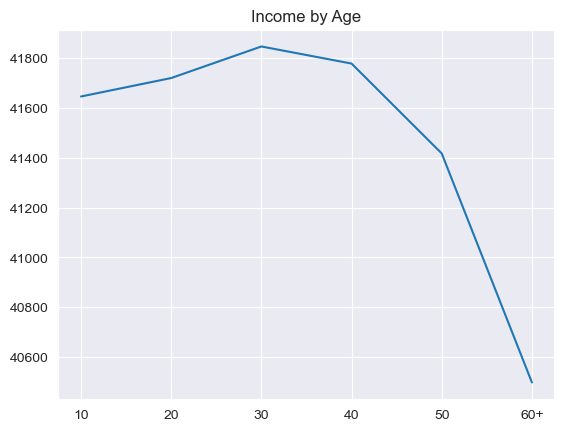

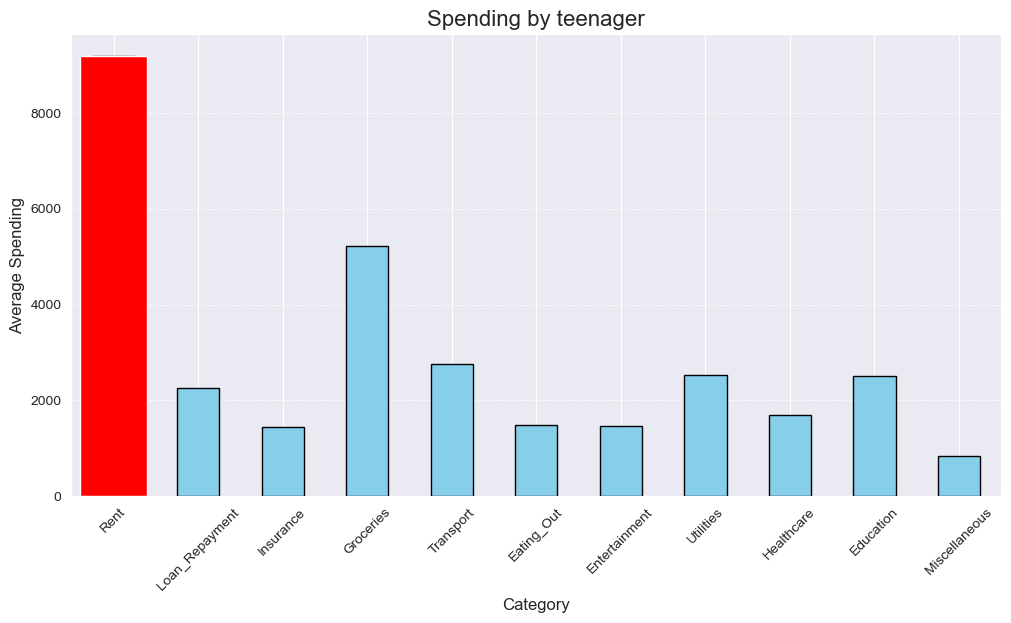

In [9]:
# 김희애1

# 기초 통계량
print(df.describe().head())

# 나이별 수입 분포
df['age_group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 100], labels=['10', '20', '30', '40', '50', '60+'])

income_by_age = df.groupby('age_group')['Income'].mean()
plt.plot(income_by_age.index, income_by_age.values)
plt.title('Income by Age')


# 10대 지출
indian_10 = df[(df['Age'] >= 10) & (df['Age'] < 20)]
x_10 = indian_10['Age']
y_10 = indian_10[['Rent', 'Loan_Repayment', 'Insurance', 'Groceries','Transport', 'Eating_Out','Entertainment', 'Utilities', 'Healthcare', 'Education','Miscellaneous']].mean()

max_category = y_10.idxmax()  # 가장 큰 평균 지출 항목의 이름
max_value = y_10.max() 

max_category,max_value

plt.figure(figsize=(12, 6))
y_10.plot(kind='bar', color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.title('Spending by teenager', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(rotation=45)  # x축 레이블 각도 조절
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 가장 큰 지출 항목 강조 표시 (빨간색 막대)
plt.bar(max_category, max_value, color='red')

# 그래프 보여주기
plt.show()



             Education   Healthcare
age_group                          
10         2463.997315  1676.746336
20         2497.088792  1665.031557
30         2550.591867  1683.597361
40         2533.422007  1664.183544
50         2470.349375  1651.288812
60+        2379.334321  1623.991370
count     20000.000000
mean      10647.367257
std       11740.637289
min       -5400.788673
25%        3774.894323
50%        7224.890977
75%       13331.950716
max      377060.218482
Name: Disposable_Income, dtype: float64


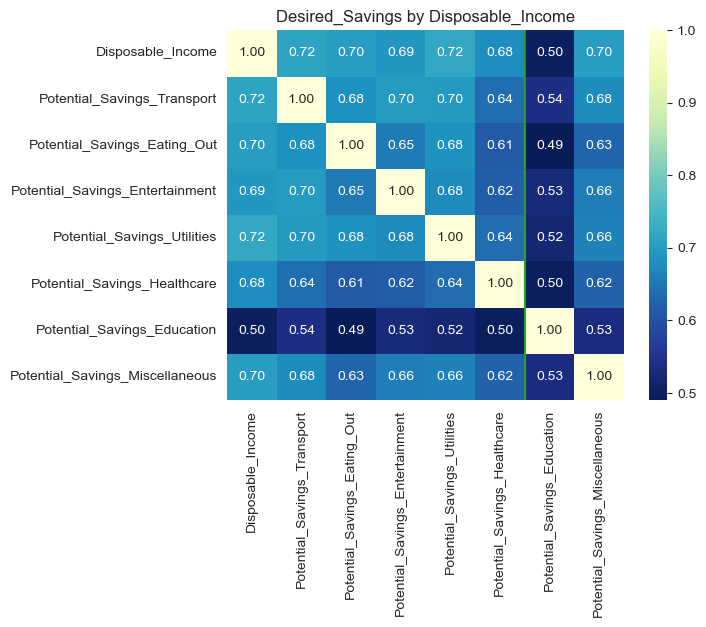

In [14]:
# 김희애2

# 나이에 따른 교육비, 건강관리 지출
df['age_group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 100], labels=['10', '20', '30', '40', '50', '60+'])

EH_by_age = df.groupby('age_group', observed=True)[['Education', 'Healthcare']].mean()

plt.plot(EH_by_age.index, EH_by_age.values)
plt.title('Education&Healthcare by Age')
print(EH_by_age)

# 가처분 소득과 잠재 저축액 상관관계 히트맵
disposable_potential = df[['Disposable_Income','Potential_Savings_Transport', 'Potential_Savings_Eating_Out','Potential_Savings_Entertainment','Potential_Savings_Utilities','Potential_Savings_Healthcare', 'Potential_Savings_Education','Potential_Savings_Miscellaneous']]

corr_matrix = disposable_potential.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,fmt='.2f', cmap='YlGnBu_r')



count     20000.000000
mean      10647.367257
std       11740.637289
min       -5400.788673
25%        3774.894323
50%        7224.890977
75%       13331.950716
max      377060.218482
Name: Disposable_Income, dtype: float64


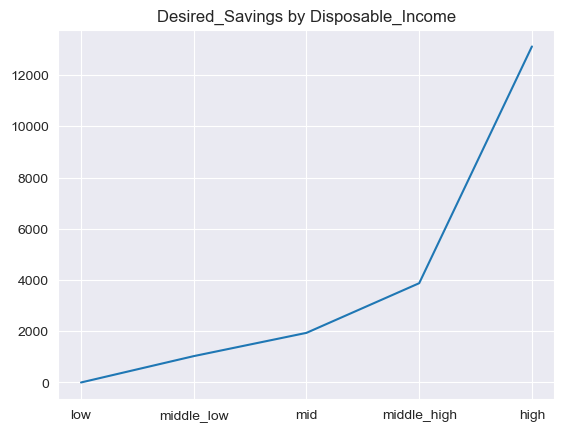

In [15]:
# 김희애 3

# 가처분 소득에 대한 희망 저축 비
di = df.sort_values(by='Disposable_Income', ascending=False)

disposable_income = di['Disposable_Income']
desired_savings = di['Desired_Savings']
ratio = desired_savings / disposable_income
ratio.describe()

df['disposable_income_group'] = pd.cut(di['Disposable_Income'], bins=[-5401,0, 3775, 7225,13332, 377061], labels=['low', 'middle_low', 'mid', 'middle_high', 'high'])

savings_by_di= df.groupby('disposable_income_group', observed=True)[['Desired_Savings']].mean()


plt.plot(savings_by_di.index, savings_by_di.values)
plt.title('Desired_Savings by Disposable_Income')

print(di['Disposable_Income'].describe())

C:\Users\playdata2\AppData\Local\Temp\ipykernel_19916\932440781.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_expend_avg = df.groupby('Income_Range')[expend_columns].mean()


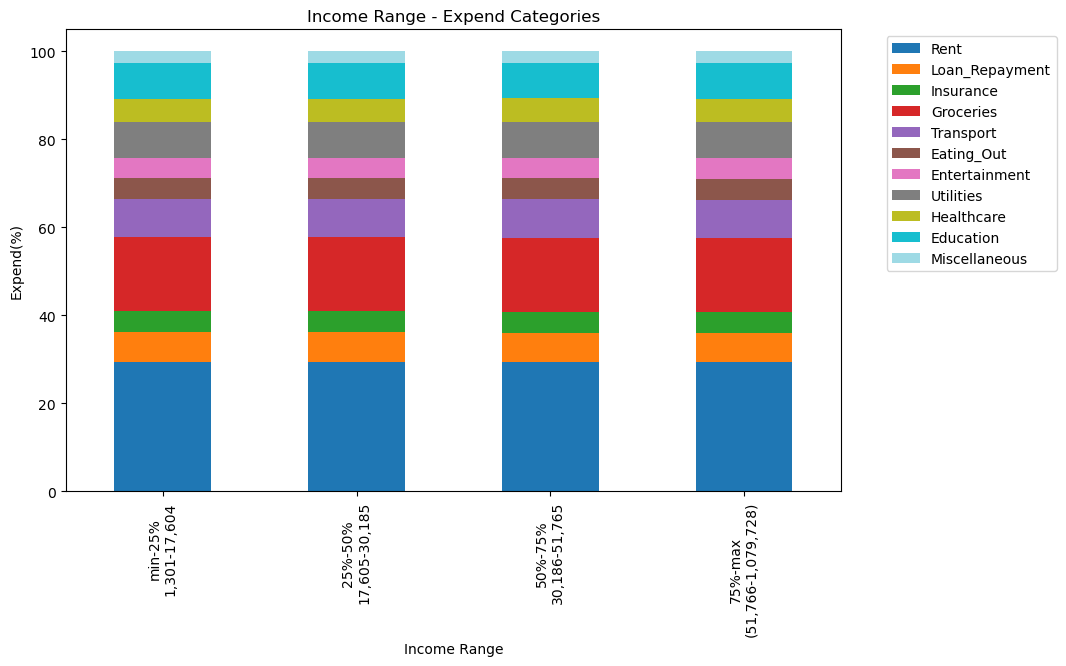

In [10]:
# 조은비 코드 시작

#소득 범위 확인
df['Income'].describe()

# imcome 5개 범위별 지출 
income_bins = [1301.187, 17604.88, 30185.38, 51765.45, 1079728]
income_labels = ["min-25%\n1,301-17,604", "25%-50%\n17,605-30,185", 
                 "50%-75%\n30,186-51,765", "75%-max\n(51,766-1,079,728)"]

df['Income_Range'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

expend_columns = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']

income_expend_avg = df.groupby('Income_Range')[expend_columns].mean()
income_expend_avg_percent = income_expend_avg.div(income_expend_avg.sum(axis=1), axis=0) * 100

# 누적막대그래프 
income_expend_avg_percent.plot(kind='bar', stacked=True, figsize=(10, 6), cmap="tab20")
plt.title("Income Range - Expend Categories")
plt.xlabel("Income Range")
plt.ylabel("Expend(%)")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

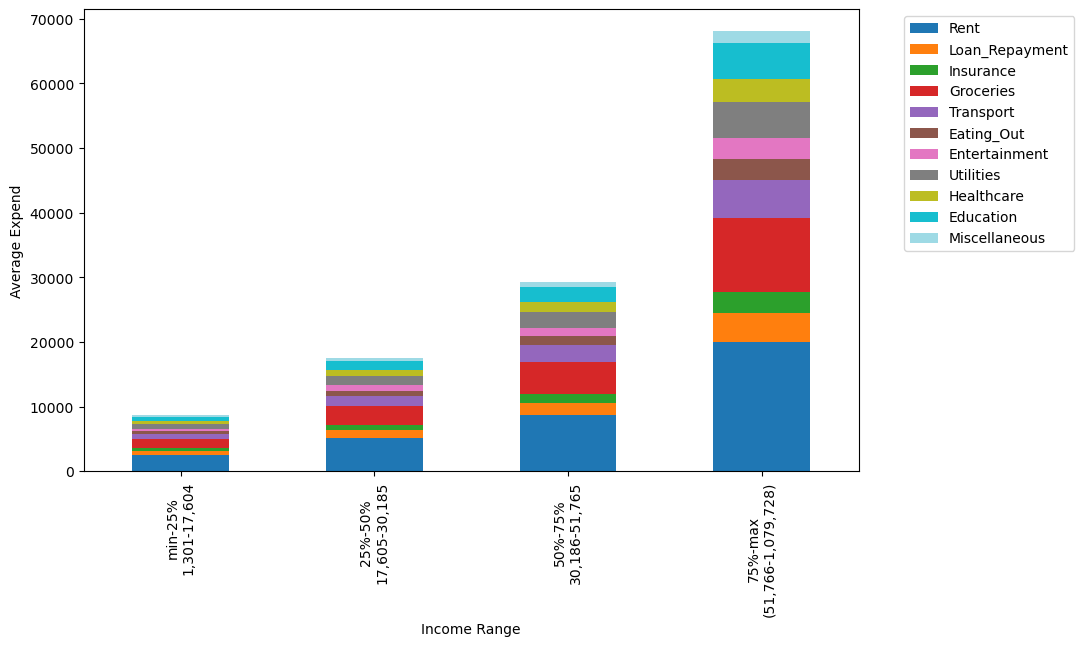

In [11]:
# 지출 결과값 
income_expend_avg.plot(kind='bar', stacked=True, figsize=(10,6), cmap="tab20")
plt.xlabel("Income Range")
plt.ylabel("Average Expend")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

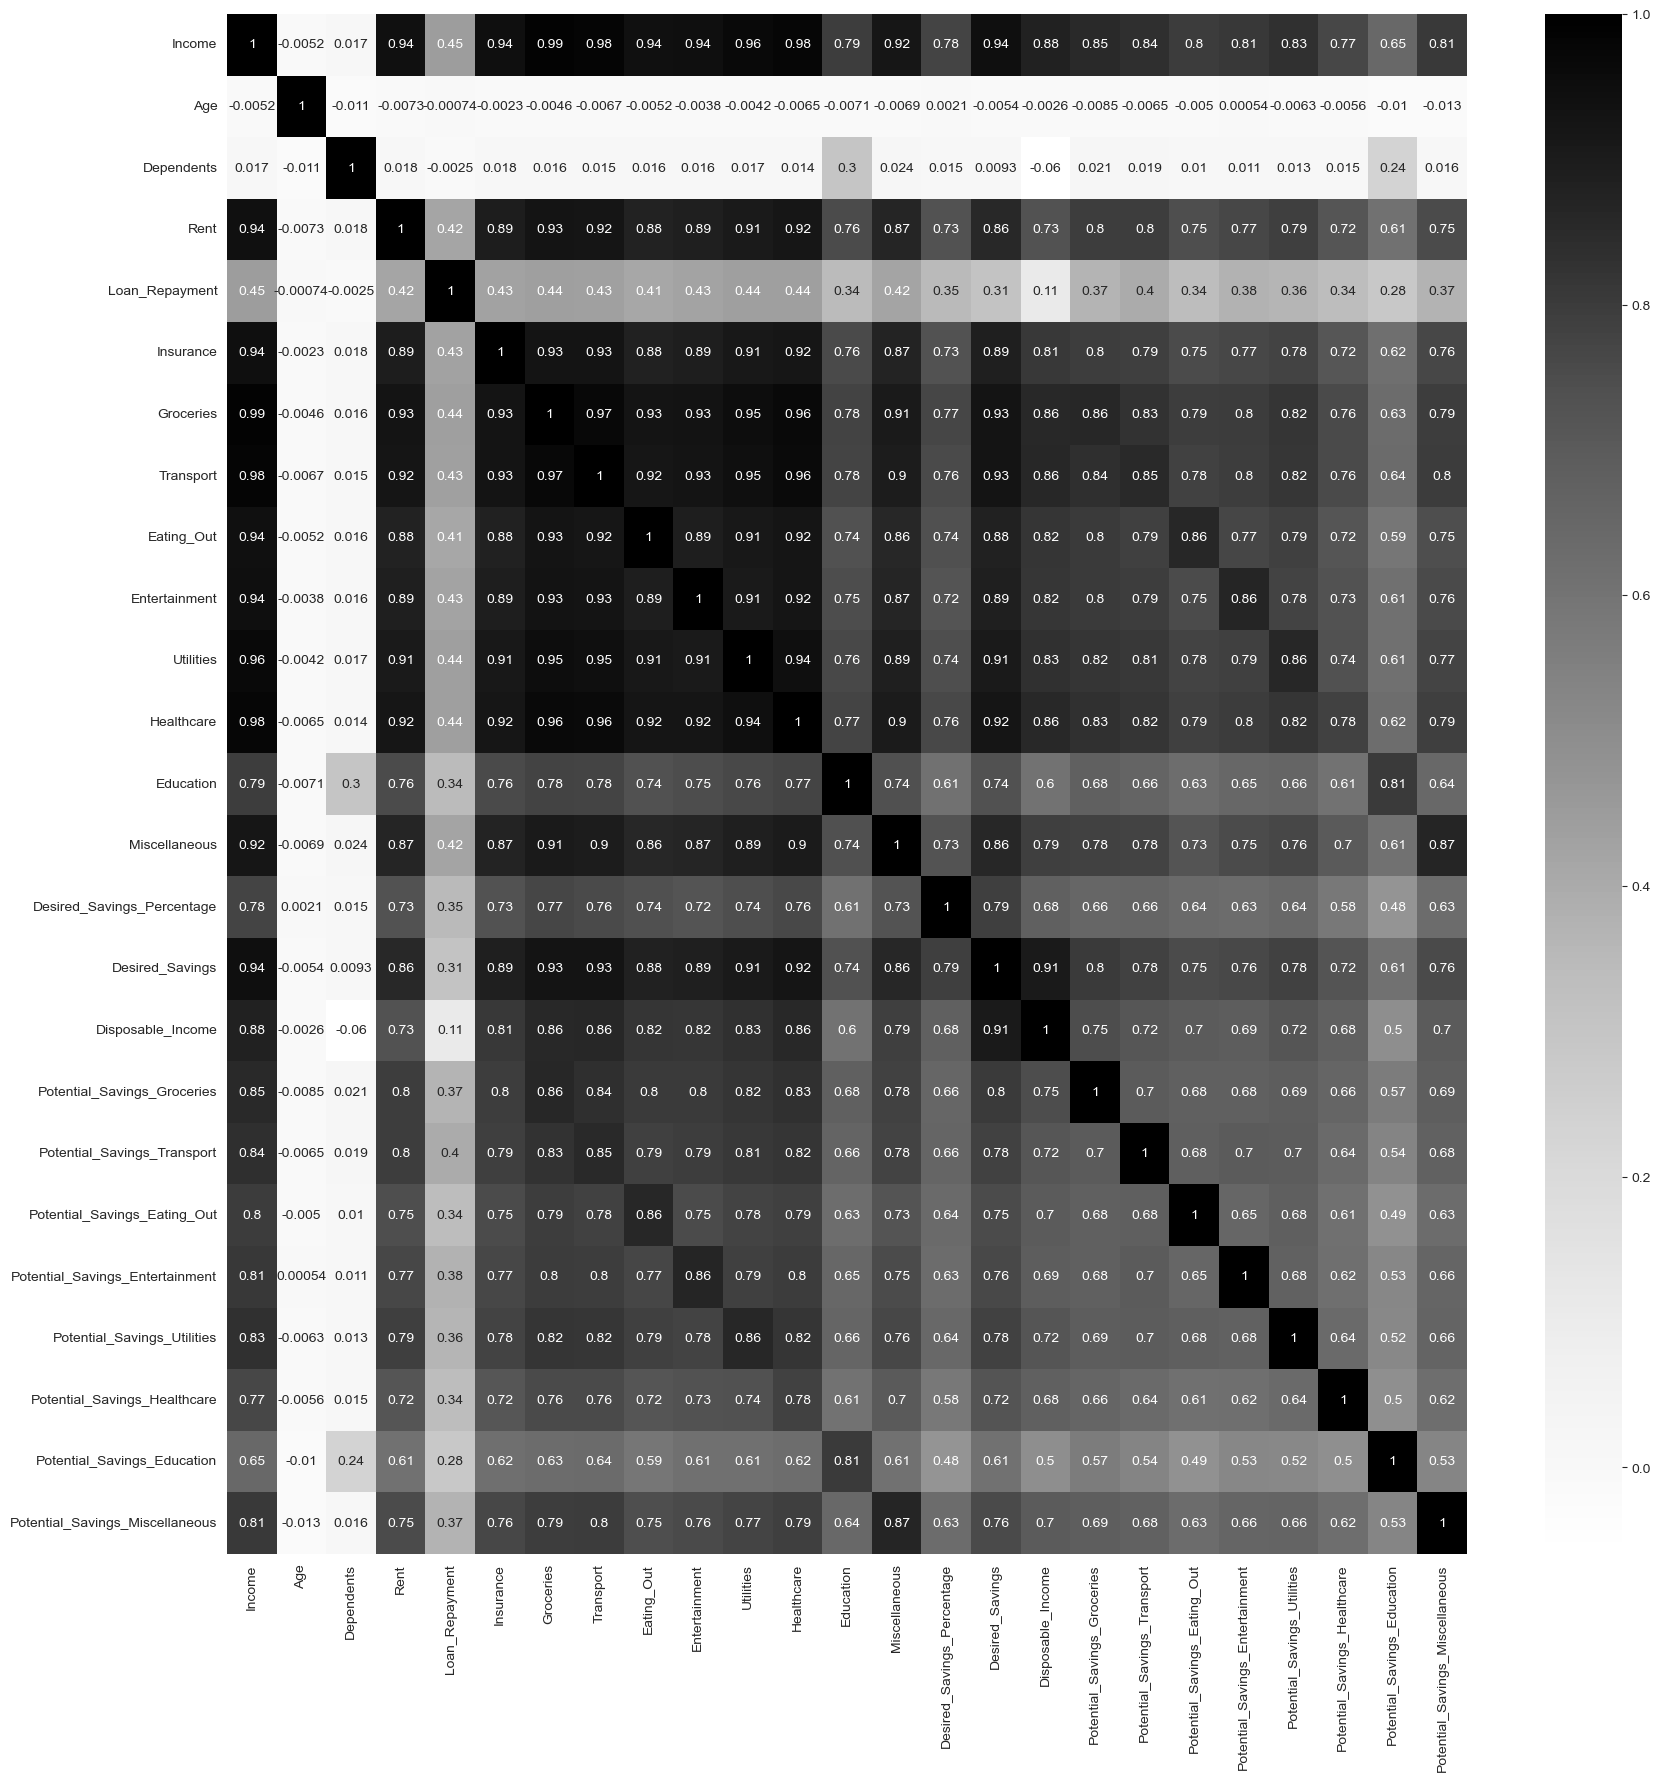

In [19]:
# 김진수 코드 시작

df.columns
dff = df.drop(['Occupation','City_Tier'], axis=1)
dff_corr = dff.corr()
dff_corr

plt.figure(figsize=(20,20))
sns.heatmap(dff_corr,annot=True, cmap='Grays')
# plt.savefig('heatmap.png',dpi=300 )
plt.show()

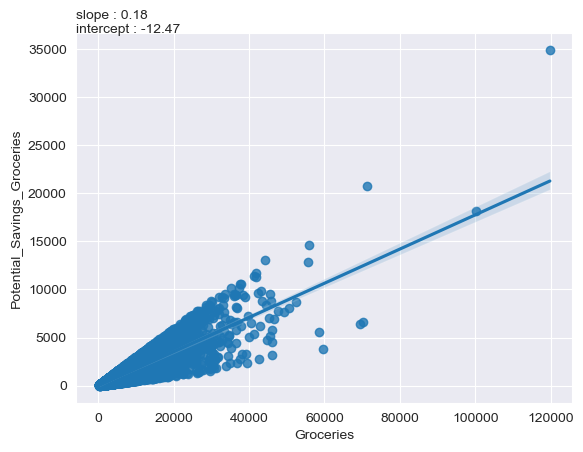

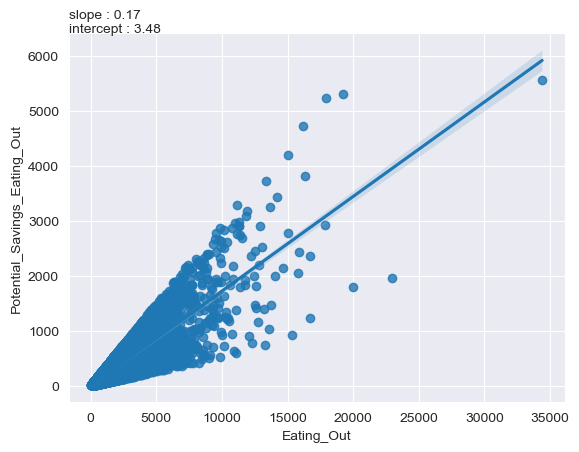

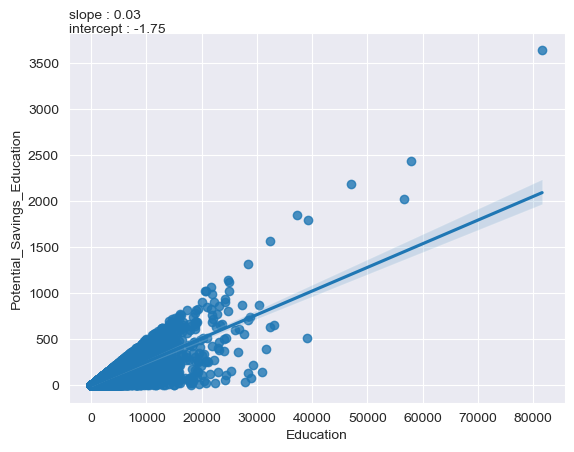

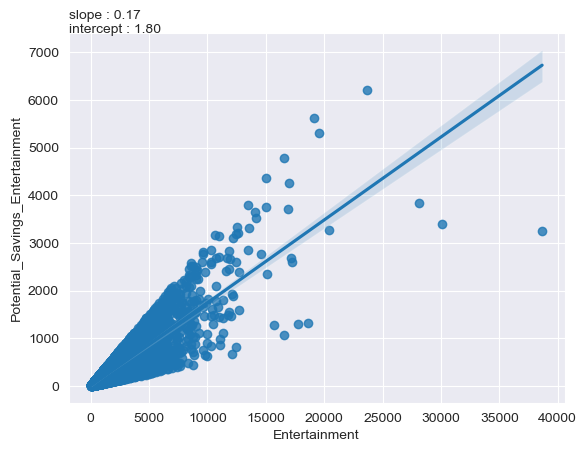

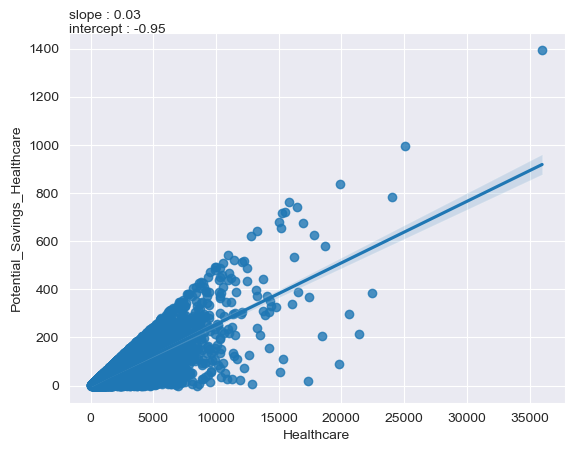

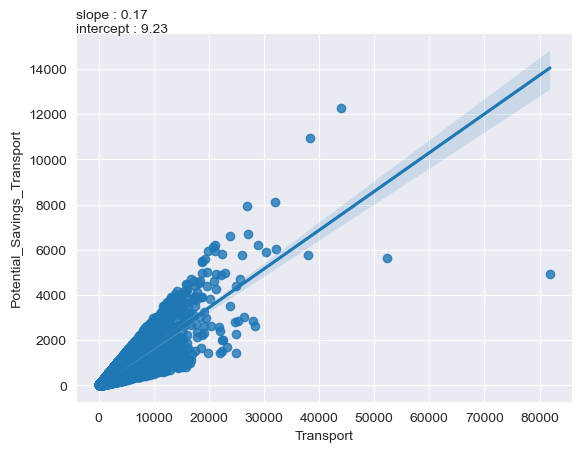

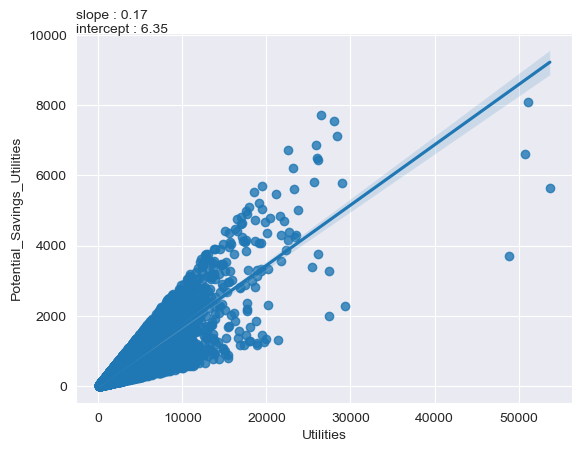

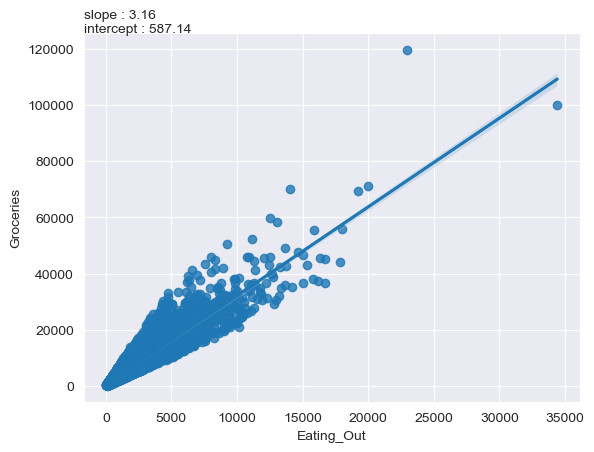

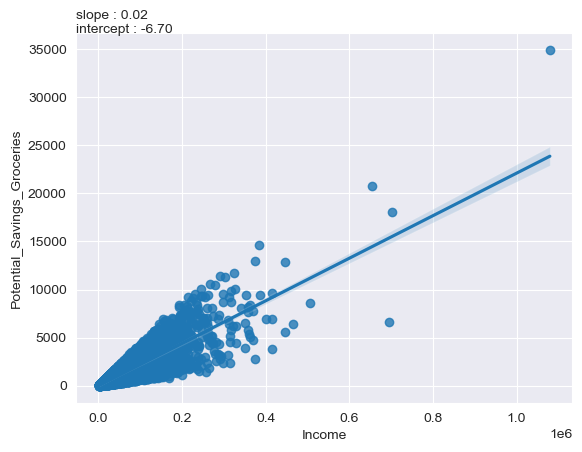

In [20]:


# Potential_Savings_Total 계산

df['Potential_Savings_Total'] = df['Potential_Savings_Groceries'] + df['Potential_Savings_Transport'] + df['Potential_Savings_Eating_Out'] + df['Potential_Savings_Entertainment'] + df['Potential_Savings_Utilities']+df['Potential_Savings_Healthcare']+df['Potential_Savings_Education'] + df['Potential_Savings_Miscellaneous']


df['Percent_Rent'] = df['Rent'] / df['Income'] * 100
df['Percent_Loan_Repayment'] = df['Loan_Repayment'] / df['Income'] * 100
df['Percent_Insurance'] = df['Insurance'] / df['Income'] * 100
df['Percent_Groceries'] = df['Groceries'] / df['Income'] * 100
df['Percent_Transport'] = df['Transport'] / df['Income'] * 100
df['Percent_Eating_Out'] = df['Eating_Out'] / df['Income'] * 100
df['Percent_Entertainment'] = df['Entertainment'] / df['Income'] * 100
df['Percent_Utilities'] = df['Utilities'] / df['Income'] * 100
df['Percent_Healthcare'] = df['Healthcare'] / df['Income'] * 100
df['Percent_Education'] = df['Education'] / df['Income'] * 100
df['Percent_Miscellaneous'] = df['Miscellaneous'] / df['Income'] * 100


# 각 항목별 Potential_Savings vs 소비 항목
import scipy

ax=sns.regplot(x=dff['Groceries'], y=dff['Potential_Savings_Groceries'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()


ax=sns.regplot(x=dff['Eating_Out'], y=dff['Potential_Savings_Eating_Out'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()

ax=sns.regplot(x=dff['Education'], y=dff['Potential_Savings_Education'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()

ax=sns.regplot(x=dff['Entertainment'], y=dff['Potential_Savings_Entertainment'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()

ax=sns.regplot(x=dff['Healthcare'], y=dff['Potential_Savings_Healthcare'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()

ax=sns.regplot(x=dff['Transport'], y=dff['Potential_Savings_Transport'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()

ax=sns.regplot(x=dff['Utilities'], y=dff['Potential_Savings_Utilities'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()

ax=sns.regplot(x=dff['Eating_Out'], y=dff['Groceries'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()

ax=sns.regplot(x=dff['Income'], y=dff['Potential_Savings_Groceries'])
slope, intercept,r,p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
str = f'slope : {'%.2f' % slope}\nintercept : {'%.2f' % intercept}'
plt.text(0,1, str,transform=ax.transAxes)
plt.show()


<Axes: >

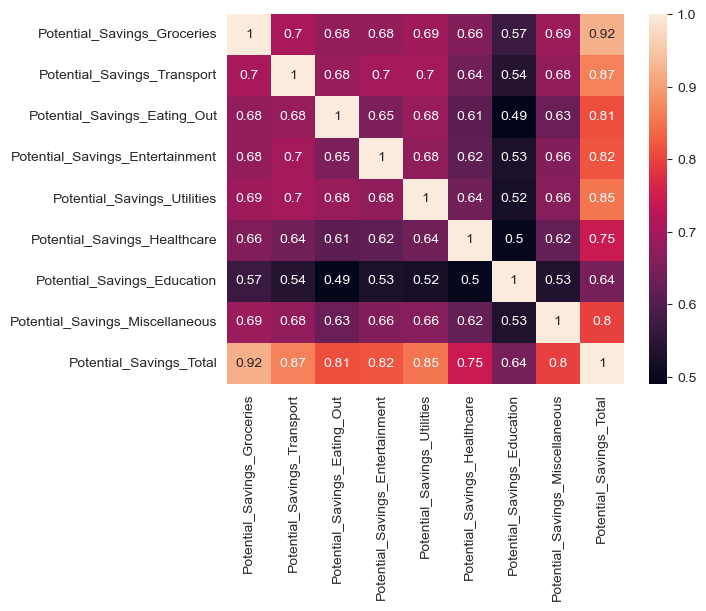

In [21]:
# Potential Heatmap 

poten_col= df.columns[df.columns.str.contains('Potential_')]

poten = df[poten_col]
poten.corr()
sns.heatmap(poten.corr(),annot=True)

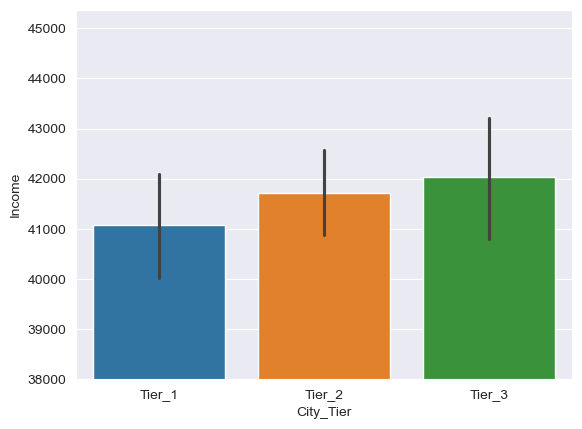

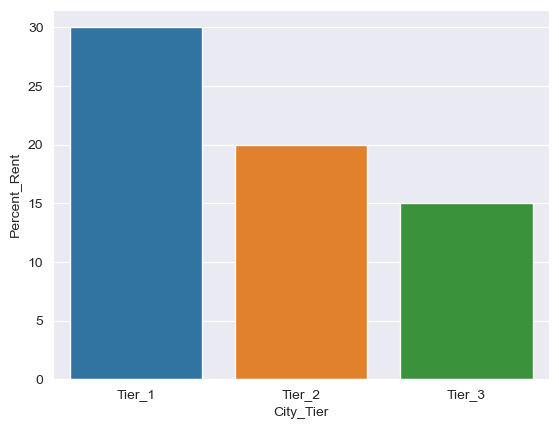

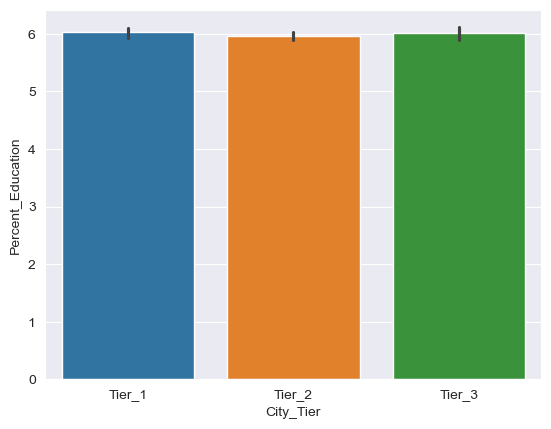

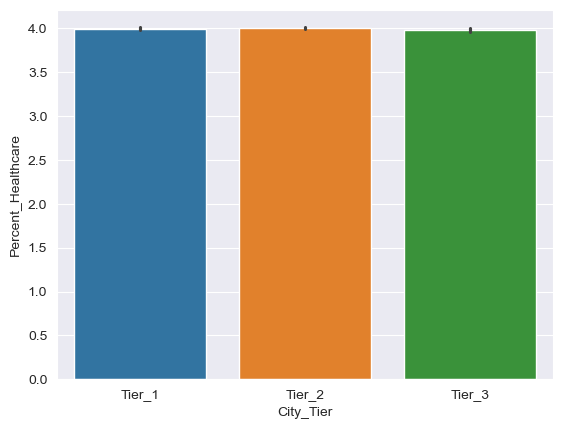

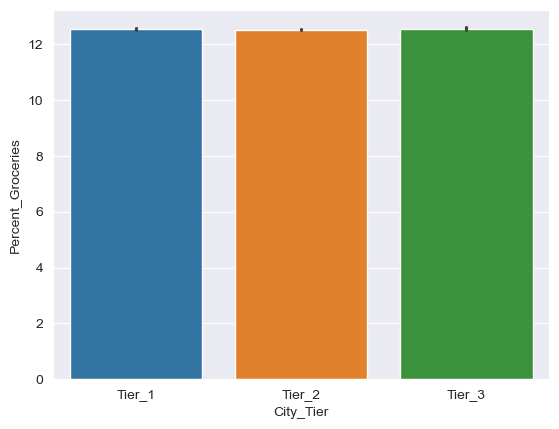

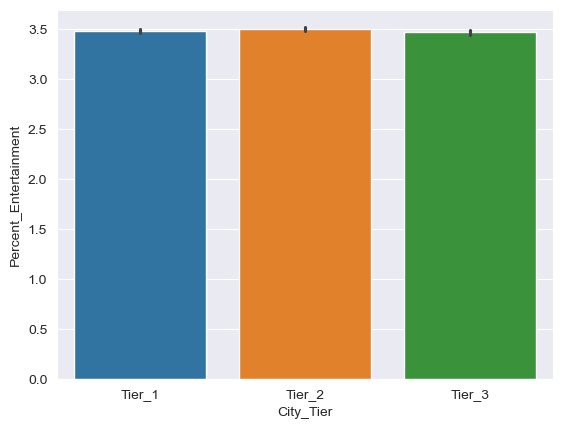

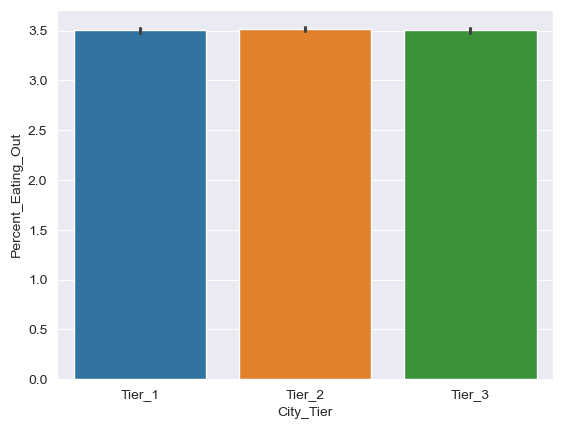

In [28]:
## 각 항목이 Tier별로 차지하는 percentage.

sns.barplot(x=df['City_Tier'], y=df['Income'], hue=df['City_Tier'])
plt.ylim(38000,)
plt.show()
sns.barplot(x=df['City_Tier'], y=df['Percent_Rent'], hue=df['City_Tier'])
plt.show()
sns.barplot(x=df['City_Tier'], y=df['Percent_Education'], hue=df['City_Tier'])
plt.show()
sns.barplot(x=df['City_Tier'], y=df['Percent_Healthcare'], hue=df['City_Tier'])
plt.show()
sns.barplot(x=df['City_Tier'], y=df['Percent_Groceries'], hue=df['City_Tier'])
plt.show()
sns.barplot(x=df['City_Tier'], y=df['Percent_Entertainment'], hue=df['City_Tier'])
plt.show()
sns.barplot(x=df['City_Tier'], y=df['Percent_Eating_Out'], hue=df['City_Tier'])
plt.show()

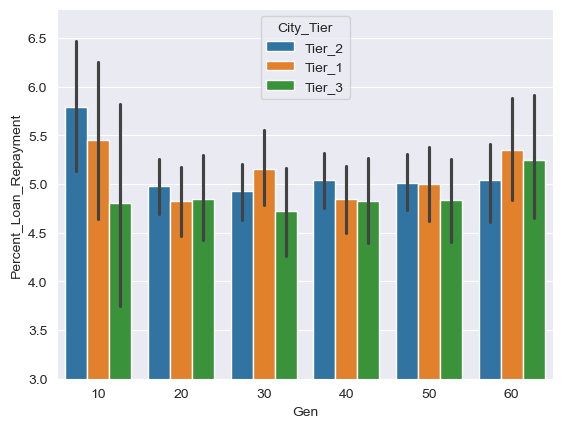

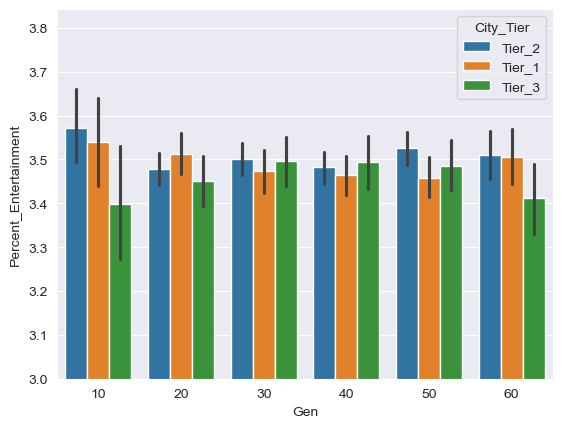

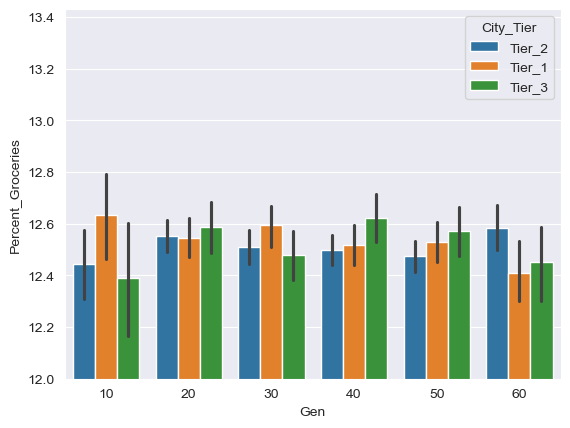

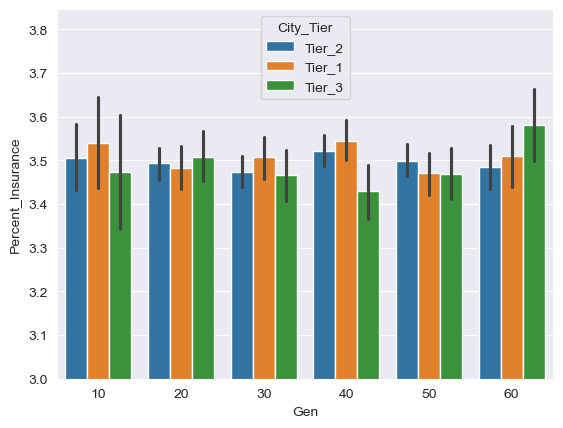

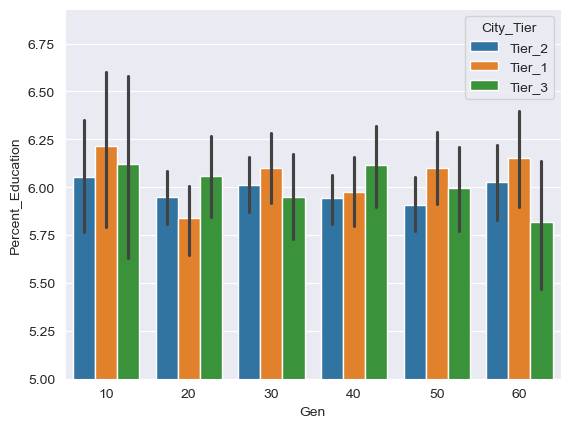

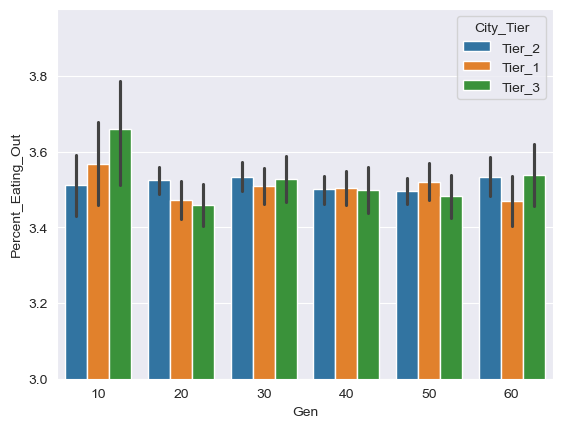

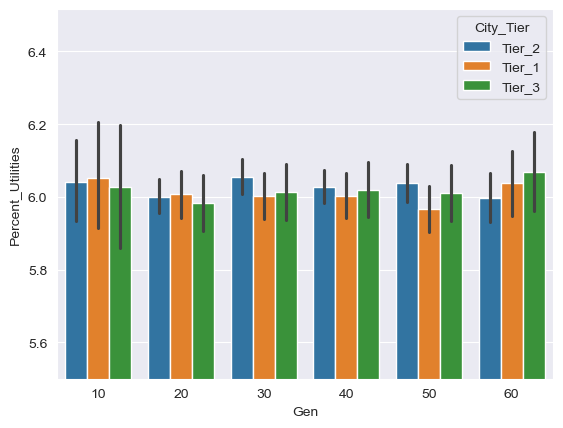

In [23]:
# 나이-지역에 따른 나이대 별 소비 percentage

df['Gen'] = (df['Age']//10)*10
sns.barplot( x=df['Gen'], y=df['Percent_Loan_Repayment'], hue=df['City_Tier'])
plt.ylim(3,)
plt.show()

sns.barplot( x=df['Gen'], y=df['Percent_Entertainment'], hue=df['City_Tier'])
plt.ylim(3,)
plt.show()

sns.barplot( x=df['Gen'], y=df['Percent_Groceries'],hue=df['City_Tier'])
plt.ylim(12,)
plt.show()

sns.barplot( x=df['Gen'], y=df['Percent_Insurance'], hue=df['City_Tier'])
plt.ylim(3,)
plt.show()

sns.barplot( x=df['Gen'], y=df['Percent_Education'], hue=df['City_Tier'])
plt.ylim(5,)
plt.show()

sns.barplot( x=df['Gen'], y=df['Percent_Eating_Out'], hue=df['City_Tier'])
plt.ylim(3,)
plt.show()

sns.barplot( x=df['Gen'], y=df['Percent_Utilities'], hue=df['City_Tier'])
plt.ylim(5.5,)
plt.show()

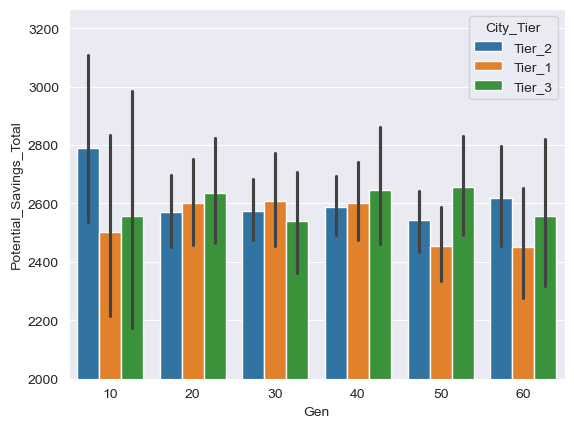

In [24]:
# 나이별 - 지역별 potential savings Total

sns.barplot( x=df['Gen'], y=df['Potential_Savings_Total'], hue=df['City_Tier'])
plt.ylim(2000,)
plt.show()